In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

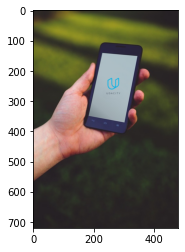

In [4]:
image = cv2.imread('phone.jpg')

image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

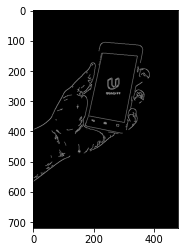

In [6]:
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

low_th = 50
high_th = 100

edges = cv2.Canny(gray,low_th,high_th)

plt.imshow(edges,cmap='gray')

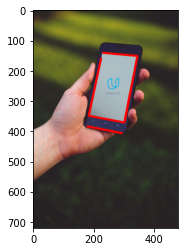

In [44]:
rho = 1
theta = np.pi/180

thresh = 60 # min nr of intersections to find a line
min_line_length = 110
max_line_gap = 4

lines = cv2.HoughLinesP(edges,rho, theta, thresh, np.array([]), min_line_length,max_line_gap)

line_image = np.copy(image_copy)

for line in lines:
    for x1,y1,x2,y2 in line:
        # print(x1,y1,x2,y2)
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

plt.imshow(line_image)

In [63]:
# Read in the image
image = cv2.imread('round_farms.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

%matplotlib qt

plt.imshow(image)

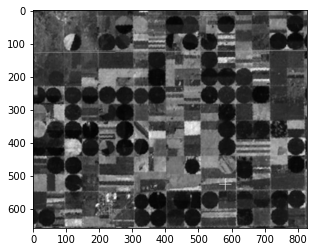

In [42]:
# Gray and blur
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)

plt.imshow(gray_blur, cmap='gray')

In [64]:
# for drawing circles on
circles_im = np.copy(image)

## TODO: use HoughCircles to detect circles
# right now there are too many, large circles being detected
# try changing the value of maxRadius, minRadius, and minDist
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1,
                           minDist=50,
                           param1=70,
                           param2=11,
                           minRadius=25,
                           maxRadius=30)

# convert circles into expected type
circles = np.uint16(np.around(circles))
# draw each one
for i in circles[0,:,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(circles_im)

print('Circles shape: ', circles.shape)


Circles shape:  (1, 65, 3)
